# Handwriting recognition
Using tensorflow and handwriting images of numbers

## Terminology
### Learning rate
Defines how fast the network learns.
The lower the value for learning rate, the slower learning, and the more likely getting better results.
The higher the learning rate, the quicker learning, giving faster training times, but may suffer on the results. 

### Epoch
Feeding the network is called __feed-forward__.
Adjusting the weights backwards is called __backpropagation__.
Feed-forward and back-propagation go in cycles.
A cycle is called __epoch__.

After each epoch runs on the train data, hopefully, the weights are tunned better, the error is lower, and the accuracy is highet.
After all epochs, we can test the model using the test set.

In [22]:
import tensorflow.compat.v1 as tf
import numpy as np 
import random as ran 
import matplotlib.pyplot as plt 

In [23]:
# Get the data to train and test the model (handwriting images and results)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [24]:
# check the data 
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
# Display an image
def display_image(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

2


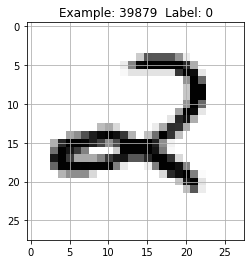

In [26]:
# Try it
display_image(39879)

### Define the model

In [27]:
# As the data is too much for one training, split in mini-batches (partitions)
# Using small batches of random data is called stochastic training 
batch_size = 100

# Number of batches
m = int(train_images.shape[0]/batch_size)
m

600

In [28]:
# Three hidden layers
# Number of nodes in each hidden layer
nodes_hl1 = 600
nodes_hl2 = 500
nodes_hl3 = 400

In [29]:
# Number of classes in output layer
classes = 10

# Number of epochs
epochs = 15

# Learning rate
learning_rate = 0.001

In [31]:
tf.disable_v2_behavior() # To use placeholder

# Array placeholders for input and output data
# needed, as we do not know the size of one mini-batch, it will be determined automatically
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [32]:
def build_graph(x):
    # Assign random values to weights and biases at each hidden layer, as well as at the output layer
        
    # first hidden layer    
    hl1 = {'w':tf.Variable(tf.random_normal([784, nodes_hl1])),
           'b':tf.Variable(tf.random_normal([nodes_hl1]))}
    # second hidden layer
    hl2 = {'w':tf.Variable(tf.random_normal([nodes_hl1, nodes_hl2])),
           'b':tf.Variable(tf.random_normal([nodes_hl2]))}
    # third hidden layer
    hl3 = {'w':tf.Variable(tf.random_normal([nodes_hl2, nodes_hl3])),
           'b':tf.Variable(tf.random_normal([nodes_hl3]))}
    # output 
    out = {'w':tf.Variable(tf.random_normal([nodes_hl3, classes])),
           'b':tf.Variable(tf.random_normal([classes]))}

    # Start feed forward
    # y = {X} * {W} + b
    # tf.matmul() - a function for multiplication of matrices
    # relu - the activation function for a node (see the graph below)
    # softmax() - alternative activation function, applied to the output nodes
    l1 = tf.matmul(x,hl1['w'])
    l1 = tf.add(l1, hl1['b'])
    l1 = tf.nn.relu(l1)

    l2 = tf.matmul(l1,hl2['w'])
    l2 = tf.add(l2, hl2['b'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hl3['w']), hl3['b'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,out['w']) + out['b']

    return output

In [33]:
build_graph(x)

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [34]:
# Validation function - will be used during the training
def validate(predicted, expected):
    correct = tf.equal(tf.argmax(predicted, 1), tf.argmax(expected, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({x:data.test.images, y:data.test.labels}))

In [35]:
# Training process set up will run in a TensorFlow Session
def train(x):
    print(x)
    # Start iteration of prediction using the computation graph above
    prediction = build_graph(x)
    
    # estimate the error/cost/loss 
    # based on the probability that the classes are mutually exclusive, so labels are informative
    
    # cost has the value we try to minimize by manipulating the weights
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y) )
    
    # minimise the cost by optimization function
    # This is the gradient decent
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    # Create session    
    with tf.Session() as sess:
        # initialize the variables we created
        sess.run(tf.global_variables_initializer())   
        
        # start iterations for each epoch
        for epoch in range(epochs):
            epoch_loss = 0
            # same for each batch (partition of our data)
            for _ in range(m):
                # get the next batch of random data of size n
                epoch_x, epoch_y = data.train.next_batch(batch_size)
                # feeding the placeholders for x and y
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch ', epoch, ' out of ', epochs,'completed,  loss:', epoch_loss)
            
            #Validate the accuracy
            validate(prediction, y)
          

In [36]:
# Run 
train(x)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


NameError: name 'data' is not defined

In [39]:
# Try a random image from the database
K = ran.randint(0, 9999) 

# Load one of the training examples - K
x_test = data.test.images[K,:].reshape(1,784)
y_test = data.test.labels[K,:].reshape(1, 10)

NameError: name 'data' is not defined

In [40]:
print(y_test)

NameError: name 'y_test' is not defined

In [41]:
# Plot image K
img = data.test.images[K]
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

NameError: name 'data' is not defined

In [42]:
data.test.images[K,:].shape

NameError: name 'data' is not defined

In [43]:
print(data.test.images[K,:])

NameError: name 'data' is not defined

In [44]:
sess = tf.Session()
prediction = sess.run(tf.argmax(y_test, 1), feed_dict={x: [img]})
print(y_test)
print('Neural Network predicted', prediction[0])
print('Real label is:', np.argmax(data.test.labels[K]))

NameError: name 'y_test' is not defined

In [45]:
# My image
from PIL import Image
from PIL import ImageOps 
from matplotlib.pyplot import imshow
%matplotlib inline

# img = image.load_img("../images/my3.png", target_size=(28, 28))
img = Image.open("../images/my3.png") 

FileNotFoundError: [Errno 2] No such file or directory: '../images/my3.png'

In [46]:
# Resize my image
img = img.resize((28,28))
img = img.convert("L") # "L" means 8-bit pixels, black and white
img = ImageOps.invert(img) # the original is white on black background

# convert the image into array of pixels
img_to_arr = np.array(img)

NameError: name 'img' is not defined